In [1]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2023-04-26 13:36:11.886398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 13:36:12.629512: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-26 13:36:12.629566: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-26 13:36:14.369411: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [5]:
# READ THE DATA 
df = pd.read_csv("TSLA-d.csv", index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
# EXTRACT THE RANGE 
# range 
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.head()

,Open,High,Low,Close,Adj Close,Volume,Range
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.392632
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.276076
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.226000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.190870
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.208500


In [7]:
# ALT WAY TO EXTRACT RANGE 
'''
The single line of code above that extracts the daily range is possible thanks to pandas. In case you aren't 
accustomed to using pandas, it would be as if I looped through the data and done this: 
'''
df['Range'] = 0 #add new column 
for i in range(len(df)): 
    df['Range'][i] = (df["High"][i] - df["Low"][i]) / df["Open"][i]
    
    

/tmp/ipykernel_4577/3966441061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Range'][i] = (df["High"][i] - df["Low"][i]) / df["Open"][i]


,Close,Adj Close,Volume,Range
Date,,,,
2010-06-29,1.592667,1.592667,281494500,0.392632
2010-06-30,1.588667,1.588667,257806500,0.276076
2010-07-01,1.464000,1.464000,123282000,0.226000
2010-07-02,1.280000,1.280000,77097000,0.190870
2010-07-06,1.074000,1.074000,103003500,0.208500


In [ ]:
# REMOVE EXTRA COLS
'''
We won't be needing Open, High, or Low anymore, since we've already extracted what we think is needed from 
them. So I will remove them from the DataFrame.
'''
df.pop("Open")
df.pop("High")
df.pop("Low")

df.head()

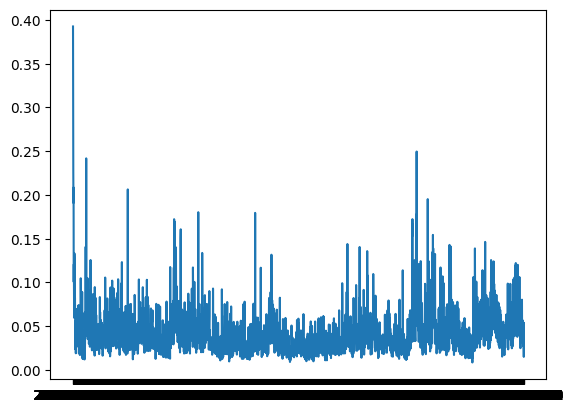

In [8]:
# PLOT RANGE 
plt.plot(df['Range'])